In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data_set.csv')
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [3]:
titles = list(data.columns)
titles

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

#### Renaming Columns 

In [4]:
data.rename(columns = {'1. What is your age?':'Age',
                       '2. Gender':'Sex',
                       '3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Q3',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Target 1',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Q5',
                       '14. Do you find it difficult to concentrate on things?':'Target 2',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Q7',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Q8',
                       '17. How often do you look to seek validation from features of social media?':'Q4',
                       '18. How often do you feel depressed or down?':'Q6',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Target 3',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'sleep' },inplace=True)

In [5]:
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Target 1',
 'Q5',
 'Target 2',
 'Q7',
 'Q8',
 'Q4',
 'Q6',
 'Target 3',
 'sleep']

In [6]:
data.drop(data.columns[-1], axis=1, inplace=True)  # drop the last column(sleep), which is not needed for our analysis

titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Target 1',
 'Q5',
 'Target 2',
 'Q7',
 'Q8',
 'Q4',
 'Q6',
 'Target 3']

In [7]:
# Swap the positions of 'Target 1' and 'Target 2'
titles[12], titles[17] = titles[17], titles[12]

# Swap the positions of 'Target 1' and 'Target 3'
titles[14], titles[18] = titles[18], titles[14]

data = data[titles]
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Target 1',
 'Target 2',
 'Target 3']

In [8]:
data.head()

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target 1,Target 2,Target 3
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,2,2,5,2,3,5,5,4
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,1,5,5,5,1,4,4,4
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,1,5,4,3,3,2,4,2
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,2,5,4,5,1,3,3,3
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,3,5,4,3,3,4,5,4


#### Missing Value Detection and Treatment

In [9]:
# Check number of records in each column of the data set. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   Q1                   481 non-null    int64  
 10  Q2                   481 non-null    int64  
 11  Q3                   481 non-null    int64  
 12  Q4                   481 non-null    int64  
 13  Q5                   481 non-null    int64  
 14  Q6                   481 non-null    int64  
 15  Q7                   481 non-null    int

There are no missing values as expected

#### Data Transformation

Gender

In [10]:
#List all the unique Gender/Sex entries.

Genders = set(data['Sex'])
print(Genders)

{'Female', 'unsure ', 'Non binary ', 'Non-binary', 'Male', 'Trans', 'There are others???', 'Nonbinary ', 'NB'}


Responses stating "There are others???" will be disregarded as they indicate a lack of seriousness in completing the questionnaire. Therefore, entries containing this response will be excluded from consideration.

In [11]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)

In [12]:
Genders = set(data['Sex'])
print(Genders)

{'Female', 'unsure ', 'Non binary ', 'Non-binary', 'Male', 'Trans', 'Nonbinary ', 'NB'}


There are numerous diverse entries in the Gender section. This variety likely arose due to the open-ended nature of allowing users to select "Others" in the Gender section of the questionnaire.

In [13]:
#Give all non-binary entries the value 'Non-binary'
data.replace('Nonbinary ','Non-binary', inplace=True)
data.replace('NB','Non-binary', inplace=True)
data.replace('Non binary ','Non-binary', inplace=True)
data.replace('unsure ','Unsure', inplace=True)

In [14]:
Genders = set(data['Sex'])
print(Genders)

{'Female', 'Unsure', 'Non-binary', 'Male', 'Trans'}


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            480 non-null    object 
 1   Age                  480 non-null    float64
 2   Sex                  480 non-null    object 
 3   Relationship Status  480 non-null    object 
 4   Occupation           480 non-null    object 
 5   Affiliations         450 non-null    object 
 6   Social Media User?   480 non-null    object 
 7   Platforms Used       480 non-null    object 
 8   Time Spent           480 non-null    object 
 9   Q1                   480 non-null    int64  
 10  Q2                   480 non-null    int64  
 11  Q3                   480 non-null    int64  
 12  Q4                   480 non-null    int64  
 13  Q5                   480 non-null    int64  
 14  Q6                   480 non-null    int64  
 15  Q7                   480 non-null    int64  


Age

Age was collected as Integers in the survay. But,
note that 'Age' is erroneously detected as float64 value in the above section. This is because of the single data record # 382. We should thus convert the 'Age' column to int64 type

In [16]:
#Showing the age entry of record #382
data.loc[382,'Age']

26.7

In [17]:
#Converting Age from float64 to int64 and displaying record # 382
data['Age'] = data['Age'].astype('int64')

In [18]:
#Showing the age entry of record #382
data.loc[382,'Age']

26

In [19]:
#float64 changed to int32
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            480 non-null    object
 1   Age                  480 non-null    int64 
 2   Sex                  480 non-null    object
 3   Relationship Status  480 non-null    object
 4   Occupation           480 non-null    object
 5   Affiliations         450 non-null    object
 6   Social Media User?   480 non-null    object
 7   Platforms Used       480 non-null    object
 8   Time Spent           480 non-null    object
 9   Q1                   480 non-null    int64 
 10  Q2                   480 non-null    int64 
 11  Q3                   480 non-null    int64 
 12  Q4                   480 non-null    int64 
 13  Q5                   480 non-null    int64 
 14  Q6                   480 non-null    int64 
 15  Q7                   480 non-null    int64 
 16  Q8           

In [20]:
features = data.columns 


#### Find Outliers 

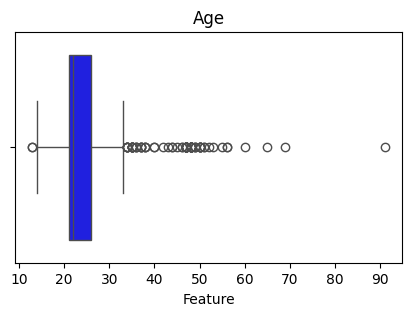

In [21]:
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
sns.boxplot(x=data['Age'], color='blue')  # Replace 'Feature' with the name of your feature
plt.xlabel('Feature')
plt.title('Age')
plt.show()


#### Identify values of outliers

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)].sort_values('Age')

# Print outliers
print("Outliers:")
print(outliers['Age'])

Outliers:
465    13
463    13
19     34
212    34
250    34
       ..
42     56
453    60
46     65
238    69
256    91
Name: Age, Length: 84, dtype: int64


In [23]:
# drop the outliear
# data.drop(data.loc[data['Age'] > 57].index, inplace=True)
# data.drop(data.loc[data['Age'] < 14].index, inplace=True)

#### Data Visualisation

To begin, let's examine the data distribution concerning the time spent on social media for 471 participants.

<Axes: xlabel='Time Spent on Social Media', ylabel='Frequency'>

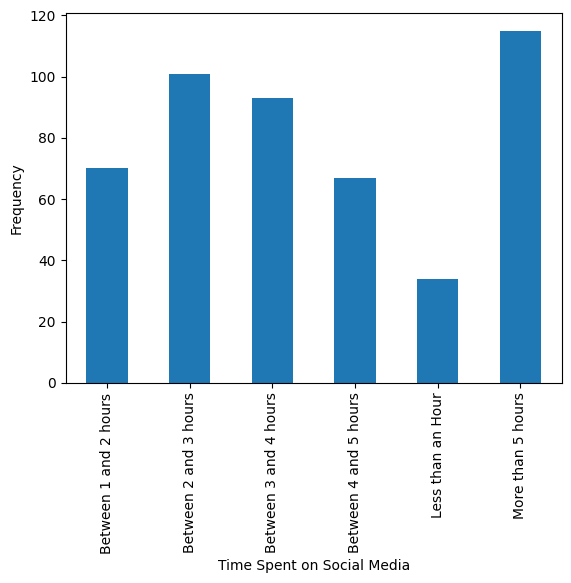

In [24]:
data.groupby('Time Spent').size().plot.bar(xlabel='Time Spent on Social Media', ylabel='Frequency')

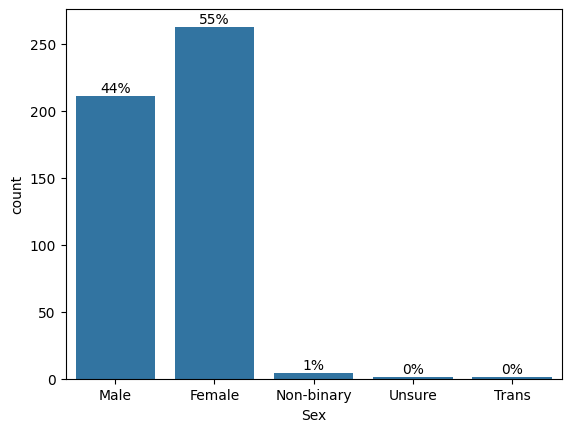

In [25]:
# Let's understand the distribution of data for 473 participants based on their Gender.

total=float(len(data))
ax = sns.countplot(x="Sex", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

#### 'Sex' distribution

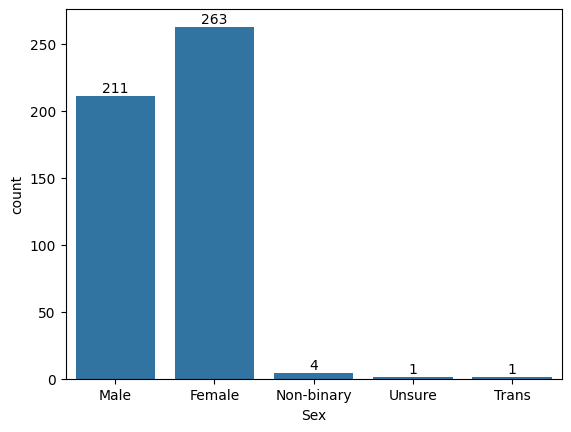

In [26]:
# Plot the count plot
ax = sns.countplot(x="Sex", data=data)

# Annotate the bars with the count of instances
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, '{0:.0f}'.format(height), ha="center")

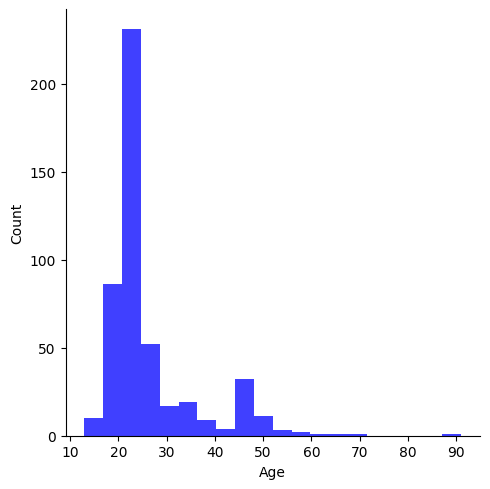

In [27]:
import seaborn as sns

sns.displot(data['Age'].dropna(), kde=False, color='blue', bins=20, edgecolor='None')
plt.show()


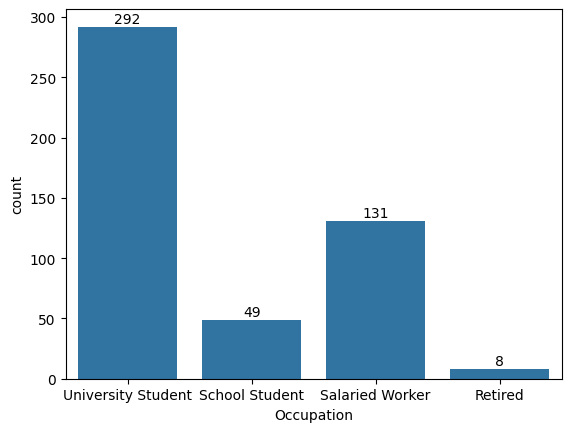

In [28]:
# Let's understand the distribution of data for 471 participants based on their Occupation.
total=float(len(data))
ax = sns.countplot(x="Occupation", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, '{0:.0f}'.format(height), ha="center")

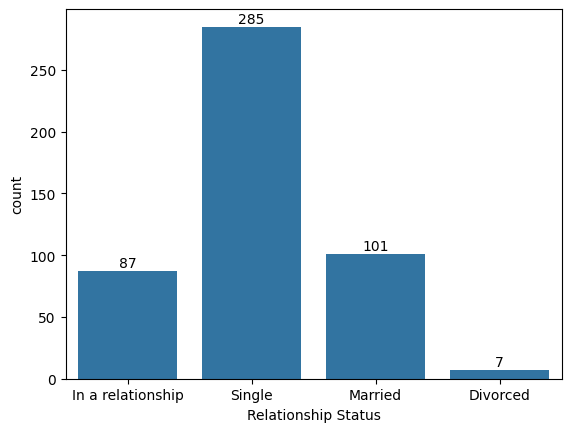

In [29]:
# Let's understand the distribution of data for 471 participants based on their Relationship Status.
total=float(len(data))
ax = sns.countplot(x="Relationship Status", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, '{0:.0f}'.format(height), ha="center")

In [30]:
#Let's see the mean target score of each Time group of participants

# Feature engineer the ADHD questions into one value
adhd_columns = ['Target 1', 'Target 2', 'Target 3']
data['Target'] = data[adhd_columns].mean(axis=1).round().astype('int64')


In [31]:
data.drop(columns=['Target 1', 'Target 2', 'Target 3'], inplace=True)

In [32]:
data.head(10)

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,2,2,5,2,3,5
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,1,5,5,5,1,4
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,1,5,4,3,3,3
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,2,5,4,5,1,3
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,3,5,4,3,3,4
5,4/18/2022 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,4,2,3,4,3,4,4,3
6,4/18/2022 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,3,2,4,4,5,5,3,3
7,4/18/2022 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,5,1,3,3
8,4/18/2022 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,1,5,1,3,3
9,4/18/2022 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1


<Axes: xlabel='Time Spent', ylabel='Mean Target Score'>

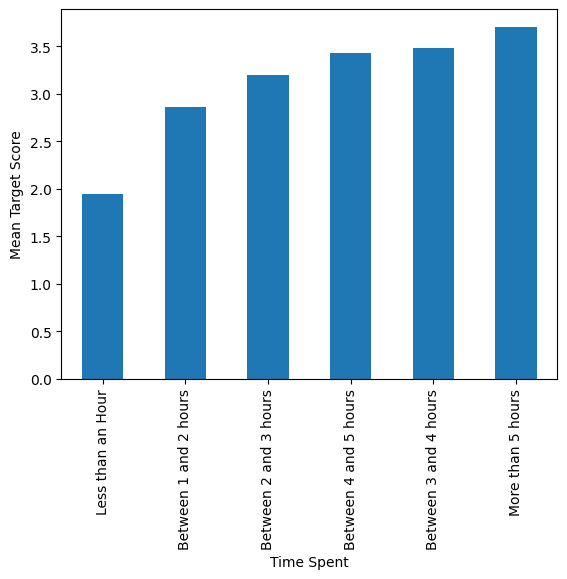

In [33]:
data.groupby('Time Spent')['Target'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Target Score')

# Convert variables to numerical values

#### Converting Time Spent category to Numerical Values

In [34]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5



In [35]:
#Converting Time Spent from object type to int64.
data['Time Spent'] = data['Time Spent'].astype('int64')

#### Gender Variables to Numerical Values

In [36]:
#setting Male to 0, Female to 1, and Others to 2.
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Non-binary', 'Sex'] = 2
data.loc[data['Sex'] == 'Trans', 'Sex'] = 2
data.loc[data['Sex'] == 'Unsure', 'Sex'] = 2



In [37]:
#Converting Sex from object type to int64.
data['Sex'] = data['Sex'].astype('int64')

#### Occupation Variables to numerical values

In [38]:
data.loc[data['Occupation'] == 'University Student', 'Occupation'] = 0
data.loc[data['Occupation'] == 'School Student', 'Occupation'] = 1
data.loc[data['Occupation'] == 'Salaried Worker', 'Occupation'] = 2
data.loc[data['Occupation'] == 'Retired', 'Occupation'] = 3

In [39]:
#Converting Occupation from object type to int64.
data['Occupation'] = data['Occupation'].astype('int64')

#### Relationship Status variables to numerical values

In [40]:
data.loc[data['Relationship Status'] == 'In a relationship', 'Relationship Status'] = 0
data.loc[data['Relationship Status'] == 'Single', 'Relationship Status'] = 1
data.loc[data['Relationship Status'] == 'Married', 'Relationship Status'] = 2
data.loc[data['Relationship Status'] == 'Divorced', 'Relationship Status'] = 3

In [41]:
#Converting Relationship Status from object type to int64.
data['Relationship Status'] = data['Relationship Status'].astype('int64')

#### "Social Media User?" variable to numerical

In [42]:
data.loc[data['Social Media User?'] == 'No', 'Social Media User?'] = 0
data.loc[data['Social Media User?'] == 'Yes', 'Social Media User?'] = 1

In [43]:
#Converting Social Media User? from object type to int64.
data['Social Media User?'] = data['Social Media User?'].astype('int64')

## Make 5 classes 3

In [44]:
# Function to determine concentration level
def get_concentration_level(target):
    if target in [1, 2]:
        return 'low'
    elif target in [3, 4]:
        return 'medium'
    elif target == 5:
        return 'high'
    else:
        return None

# Apply the function to the Target column and create the new concentration_level column
data['Difficulty_level'] = data['Target'].apply(get_concentration_level)

# Display the DataFrame
data.head(10)

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target,Difficulty_level
0,4/18/2022 19:18:47,21,0,0,0,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,3,2,2,2,5,2,3,5,high
1,4/18/2022 19:19:28,21,1,1,0,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,3,2,1,5,5,5,1,4,medium
2,4/18/2022 19:25:59,21,1,1,0,University,1,"Facebook, Instagram, YouTube, Pinterest",3,3,2,1,1,5,4,3,3,3,medium
3,4/18/2022 19:29:43,21,1,1,0,University,1,"Facebook, Instagram",5,4,2,1,2,5,4,5,1,3,medium
4,4/18/2022 19:33:31,21,1,1,0,University,1,"Facebook, Instagram, YouTube",2,3,5,4,3,5,4,3,3,4,medium
5,4/18/2022 19:33:48,22,1,1,0,University,1,"Facebook, Twitter, Instagram, YouTube, Discord...",2,4,4,2,3,4,3,4,4,3,medium
6,4/18/2022 19:36:12,21,1,2,0,University,1,"Facebook, Instagram, YouTube, Snapchat, TikTok",3,4,3,2,4,4,5,5,3,3,medium
7,4/18/2022 19:36:17,21,1,0,0,University,1,"Facebook, Instagram, YouTube",5,5,2,3,1,3,5,1,3,3,medium
8,4/18/2022 19:39:36,21,1,0,0,University,1,"Facebook, Instagram, YouTube",5,5,2,3,1,1,5,1,3,3,medium
9,4/18/2022 19:41:34,20,0,1,0,University,0,"Reddit, Pinterest",0,1,1,1,1,1,1,1,1,1,low


#### "Difficulty_level" variable to numerical

In [45]:
data.loc[data['Difficulty_level'] == 'low', 'Difficulty_level'] = 0
data.loc[data['Difficulty_level'] == 'medium', 'Difficulty_level'] = 1
data.loc[data['Difficulty_level'] == 'high', 'Difficulty_level'] = 2

In [46]:
#Converting Difficulty_level from object type to int64.
data['Difficulty_level'] = data['Difficulty_level'].astype('int64')

#### Correlation Plot and Heatmap

In [47]:
data.drop(['Timestamp', 'Affiliations', 'Target'], inplace = True, axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  480 non-null    int64 
 1   Sex                  480 non-null    int64 
 2   Relationship Status  480 non-null    int64 
 3   Occupation           480 non-null    int64 
 4   Social Media User?   480 non-null    int64 
 5   Platforms Used       480 non-null    object
 6   Time Spent           480 non-null    int64 
 7   Q1                   480 non-null    int64 
 8   Q2                   480 non-null    int64 
 9   Q3                   480 non-null    int64 
 10  Q4                   480 non-null    int64 
 11  Q5                   480 non-null    int64 
 12  Q6                   480 non-null    int64 
 13  Q7                   480 non-null    int64 
 14  Q8                   480 non-null    int64 
 15  Difficulty_level     480 non-null    int64 
dtypes: int64(15),

## Data set for check correlation

In [48]:
corr_data = data.drop(columns=['Platforms Used'], inplace=False)

## Encoding the "Platforms Used"

In [49]:
# Define the social media platforms
social_media_platforms = ["Facebook", "Instagram", "YouTube", "Snapchat", "Twitter", "Discord", "Reddit", "Pinterest", "TikTok"]

# Function to transform social media platforms
def transform_social_media(platforms):
    result = {platform: 0 for platform in social_media_platforms}
    for platform in platforms.split(', '):
        if platform in result:
            result[platform] = 1
    return result

# Apply transformation to social media platforms column
social_media_transformed = data["Platforms Used"].apply(transform_social_media)
social_media_df = pd.DataFrame(list(social_media_transformed))


# Concatenate the transformed data with the original dataset
data = pd.concat([data, social_media_df], axis=1)

# Drop the original columns that were transformed
data.drop(columns=["Platforms Used"], inplace=True)

data = data.fillna(0)
data = data.astype('int64')



### Check the validity of encoding

In [50]:
df_old = pd.read_csv('../data_set.csv')

df_old.head(5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [51]:
data.head(5)

,Age,Sex,Relationship Status,Occupation,Social Media User?,Time Spent,Q1,Q2,Q3,Q4,...,Difficulty_level,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok
0,21,0,0,0,1,2,5,3,2,2,...,2,1,1,1,0,1,1,1,0,0
1,21,1,1,0,1,5,4,3,2,1,...,1,1,1,1,0,1,1,1,0,0
2,21,1,1,0,1,3,3,2,1,1,...,1,1,1,1,0,0,0,0,1,0
3,21,1,1,0,1,5,4,2,1,2,...,1,1,1,0,0,0,0,0,0,0
4,21,1,1,0,1,2,3,5,4,3,...,1,1,1,1,0,0,0,0,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 368
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  481 non-null    int64
 1   Sex                  481 non-null    int64
 2   Relationship Status  481 non-null    int64
 3   Occupation           481 non-null    int64
 4   Social Media User?   481 non-null    int64
 5   Time Spent           481 non-null    int64
 6   Q1                   481 non-null    int64
 7   Q2                   481 non-null    int64
 8   Q3                   481 non-null    int64
 9   Q4                   481 non-null    int64
 10  Q5                   481 non-null    int64
 11  Q6                   481 non-null    int64
 12  Q7                   481 non-null    int64
 13  Q8                   481 non-null    int64
 14  Difficulty_level     481 non-null    int64
 15  Facebook             481 non-null    int64
 16  Instagram            481 non-nu

In [53]:
corr_data.corr()

,Age,Sex,Relationship Status,Occupation,Social Media User?,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Difficulty_level
Age,1.000000,-0.134974,0.574534,0.642765,-0.046849,-0.361333,-0.224916,-0.231384,-0.124569,-0.039331,-0.291707,-0.306162,-0.092456,0.019057,-0.249721
Sex,-0.134974,1.000000,-0.084293,-0.121047,0.087492,0.215704,0.059208,0.078414,0.117202,0.056374,0.131022,0.136031,0.117992,-0.074349,0.139873
Relationship Status,0.574534,-0.084293,1.000000,0.513508,-0.032634,-0.305014,-0.140665,-0.190131,-0.132776,-0.061909,-0.216630,-0.253143,-0.117972,0.012879,-0.165698
Occupation,0.642765,-0.121047,0.513508,1.000000,-0.054445,-0.299036,-0.164175,-0.227621,-0.151740,-0.071887,-0.253856,-0.289300,-0.144646,0.010823,-0.228446
Social Media User?,-0.046849,0.087492,-0.032634,-0.054445,1.000000,0.111780,0.088178,0.138563,0.100275,0.092571,0.117772,0.116753,0.103158,0.007987,0.113816
Time Spent,-0.361333,0.215704,-0.305014,-0.299036,0.111780,1.000000,0.393191,0.378661,0.397034,0.110442,0.333709,0.336852,0.200647,0.047960,0.327017
Q1,-0.224916,0.059208,-0.140665,-0.164175,0.088178,0.393191,1.000000,0.463131,0.358841,0.144875,0.254884,0.317977,0.148129,0.086795,0.343088
Q2,-0.231384,0.078414,-0.190131,-0.227621,0.138563,0.378661,0.463131,1.000000,0.511107,0.271599,0.350614,0.385813,0.288675,0.075236,0.551172
Q3,-0.124569,0.117202,-0.132776,-0.151740,0.100275,0.397034,0.358841,0.511107,1.000000,0.248377,0.357884,0.338191,0.321737,0.130233,0.469450
Q4,-0.039331,0.056374,-0.061909,-0.071887,0.092571,0.110442,0.144875,0.271599,0.248377,1.000000,0.208223,0.271693,0.417483,0.154696,0.262809


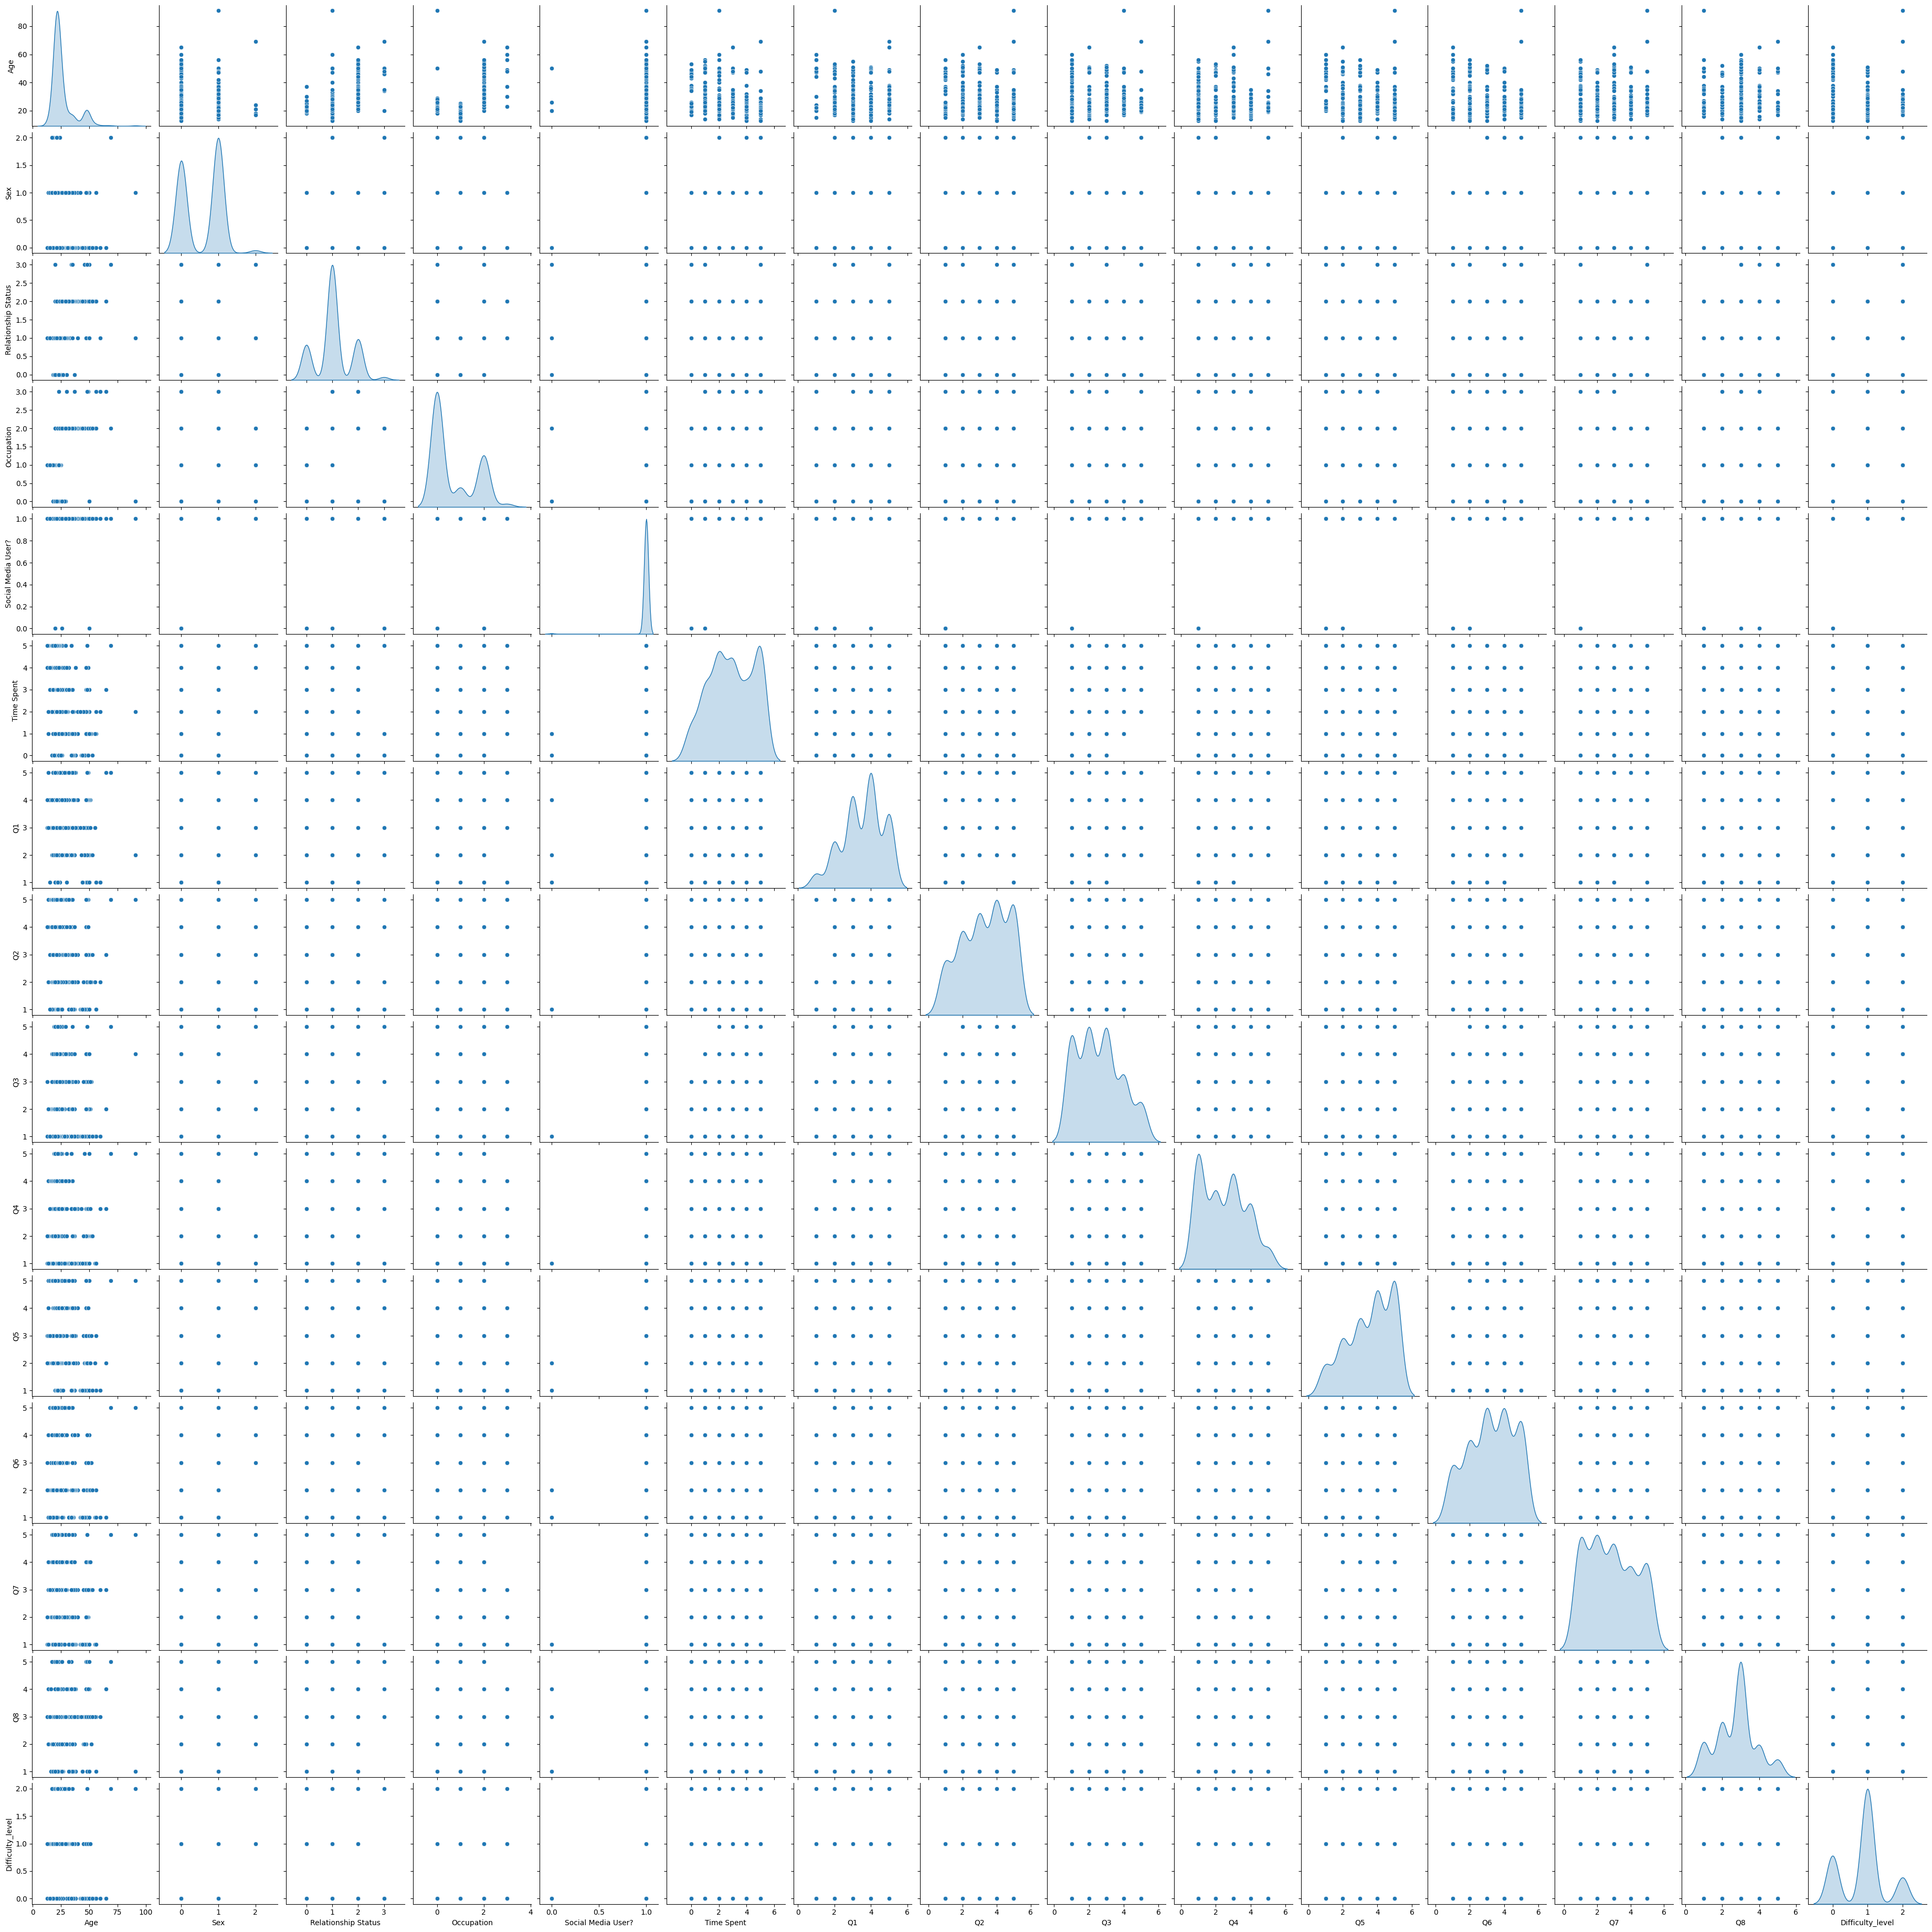

In [54]:
sns.pairplot(corr_data,diag_kind='kde')


<Axes: >

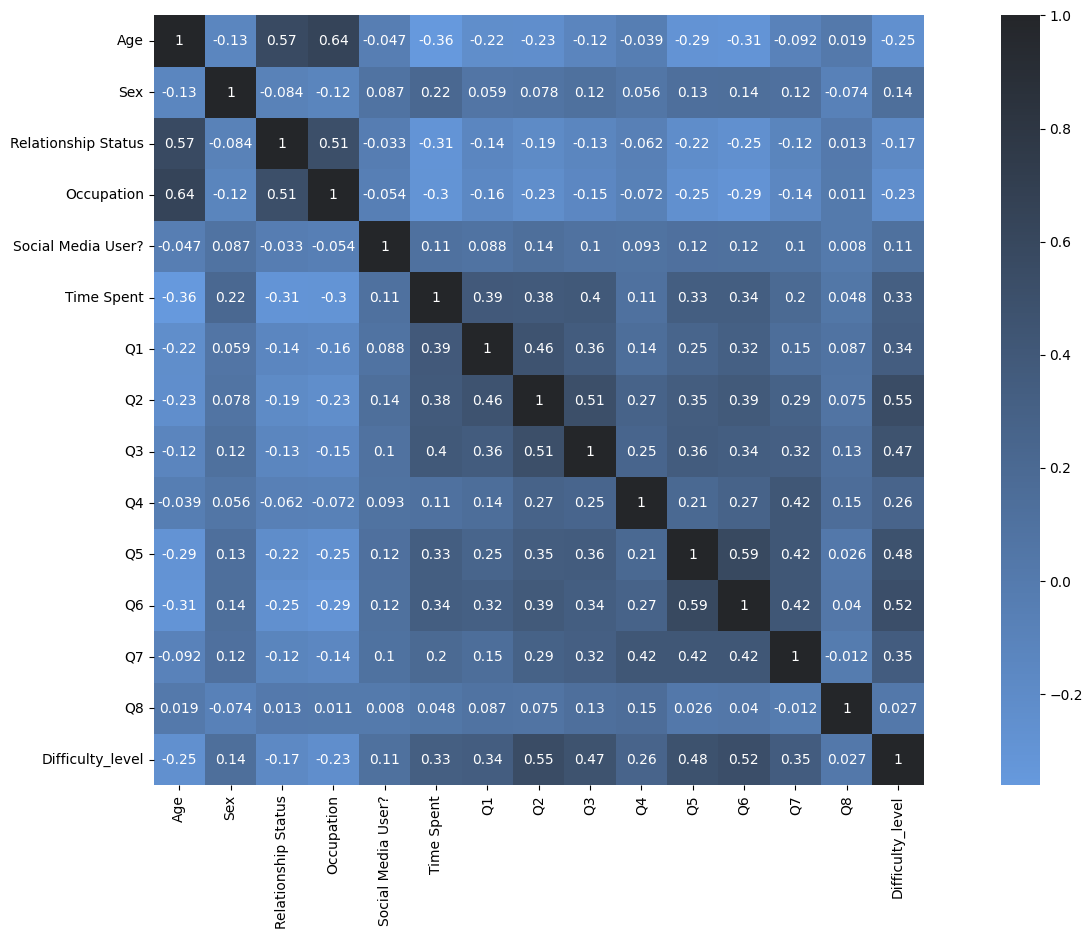

In [55]:
f, ax = plt.subplots(figsize=(20, 10))
corr = corr_data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)

## Deleting the last row of the dataset

In [57]:
data.drop(index=data.index[-1], inplace=True)

# Check new shape
print(data.shape)

(480, 24)


In [58]:
data.to_csv('../eda_data.csv', index=False)